In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import seaborn as sns
from tensorflow import keras  

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\eager\context.py)

In [4]:
#importing the data
(x_train, y_train), (x_test, y_test) =datasets.cifar10.load_data() 

In [5]:
#This is a data set of 50000 images of 32*32*3 pixel for train the model , it contains 10 different type of class.
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape #  data set of  images of 32*32*3 pixel  for testing the model ,it contains 10 different type of class.

In [22]:
y_test.shape # contains output class lebel from (0 to 9) for all diffrent 10 images class for testing model.

(10000, 1)

In [ ]:
y_train.shape # contains output class lebel from (0 to 9) for all diffrent 10 images class for train the model.

In [18]:
y_train[5][0]

1

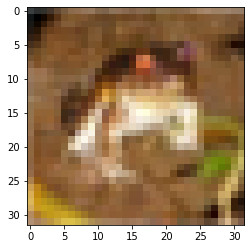

In [8]:
plt.imshow(x_train[0], cmap="gray")

In [19]:
x_test.shape

(10000, 32, 32, 3)

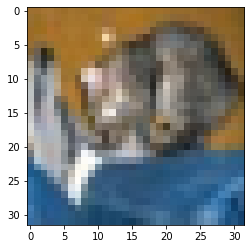

In [20]:
plt.imshow(x_test[0])

In [24]:
y_train=y_train.reshape(-1,)
y_train.shape

(50000,)

In [25]:
y_test=y_test.reshape(-1,)
y_test.shape

(10000,)

In [26]:
x_train=x_train/255

In [27]:
x_test=x_test/255

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
y_train.shape

(50000,)

In [30]:
classes=["airplane","automobile","bird", "cat","deer","dog","frog","horse","sheep","truck"]

In [31]:
classes[9]

'truck'

In [33]:
model= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
   layers.Dense(3000, activation="relu"),
  layers.Dense(1000, activation="relu"),
   layers.Dense(10, activation="sigmoid")
        
])

In [34]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.8581 - accuracy: 0.3346
Epoch 2/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.6582 - accuracy: 0.4143
Epoch 3/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5718 - accuracy: 0.4447
Epoch 4/10
1563/1563 [==============================] - 114s 73ms/step - loss: 1.5096 - accuracy: 0.4671
Epoch 5/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.4603 - accuracy: 0.4867
Epoch 6/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4143 - accuracy: 0.5022s - loss: 1.4144 - ac
Epoch 7/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.3783 - accuracy: 0.5154
Epoch 8/10
1563/1563 [==============================] - 112s 71ms/step - loss: 1.3385 - accuracy: 0.5308
Epoch 9/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.3064 - accuracy: 0.5407
Epoch 10/10
1563/1563 [===========

In [37]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 8s 24ms/step - loss: 1.4365 - accuracy: 0.4967


[1.4365499019622803, 0.4966999888420105]

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
y_test_predction = model.predict(x_test)

In [41]:
y_test_predction[0]

array([1.8413663e-03, 3.8418770e-03, 3.9827526e-03, 2.2665083e-02,
       1.9469857e-03, 5.3222179e-03, 3.7831962e-03, 6.1071485e-05,
       8.1734061e-03, 6.3940883e-04], dtype=float32)

In [42]:
y_predt_label=[np.argmax(i) for i in y_test_predction]

In [43]:
y_predt_label[0:10]

[3, 9, 8, 8, 4, 6, 1, 6, 4, 1]

In [44]:
print(" classification report : \n ", classification_report(y_test, y_predt_label))

 classification report : 
                precision    recall  f1-score   support

           0       0.50      0.58      0.54      1000
           1       0.53      0.70      0.60      1000
           2       0.56      0.16      0.24      1000
           3       0.38      0.32      0.35      1000
           4       0.43      0.48      0.46      1000
           5       0.55      0.28      0.37      1000
           6       0.56      0.55      0.56      1000
           7       0.63      0.51      0.56      1000
           8       0.49      0.77      0.60      1000
           9       0.44      0.62      0.51      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.48     10000
weighted avg       0.51      0.50      0.48     10000



In [45]:
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predt_label)

In [46]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[581,  51,  10,  14,  21,   1,  14,   9, 223,  76],
       [ 24, 699,   2,   7,   8,   2,   6,  10,  86, 156],
       [151,  47, 156,  91, 220,  45, 111,  56,  74,  49],
       [ 57,  65,  24, 318,  72, 103,  97,  45,  91, 128],
       [ 91,  35,  33,  52, 485,  21, 100,  69,  64,  50],
       [ 56,  43,  28, 209,  80, 282,  67,  79,  85,  71],
       [ 32,  49,  10,  69, 142,  27, 553,  18,  41,  59],
       [ 73,  42,  12,  47,  81,  28,  24, 509,  43, 141],
       [ 67,  71,   2,  14,   7,   2,   2,   2, 765,  68],
       [ 21, 222,   1,  13,   4,   4,  11,  17,  88, 619]])>

In [51]:
cnn_model=  models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),input_shape=(32,32,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3),input_shape=(32,32,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
        
]) 

In [52]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
cnn_model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4427 - accuracy: 0.48411s -
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1003 - accuracy: 0.61650s - loss:
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9760 - accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8930 - accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8306 - accuracy: 0.7113
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7749 - accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7297 - accuracy: 0.7480
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6873 - accuracy: 0.7598
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6472 - accuracy: 0.7726
Epoch 10/10
1563/1563 [===========================

In [54]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9426 - accuracy: 0.7006


[0.9425757527351379, 0.7006000280380249]

In [55]:
y_test_predt = cnn_model.predict(x_test)

In [56]:
y_test_predt[0]

array([3.4892833e-05, 5.3945394e-05, 4.5385095e-04, 9.7130066e-01,
       1.4585022e-04, 2.5794655e-02, 2.1179353e-03, 1.3568203e-05,
       3.8119400e-05, 4.6537600e-05], dtype=float32)

In [57]:
y_test_predt_label=[ np.argmax(i) for i in y_test_predt]

In [58]:
y_test_predt_label[0:5]

[3, 8, 8, 0, 4]

In [59]:
print(" classification report : \n ", classification_report(y_test, y_test_predt_label))

 classification report : 
                precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.89      0.74      0.81      1000
           2       0.60      0.60      0.60      1000
           3       0.58      0.44      0.50      1000
           4       0.65      0.66      0.65      1000
           5       0.55      0.68      0.61      1000
           6       0.80      0.75      0.78      1000
           7       0.64      0.82      0.72      1000
           8       0.84      0.79      0.82      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [60]:
cm1= tf.math.confusion_matrix(labels=y_test,predictions=y_test_predt_label)

In [61]:
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[722,  11,  83,  17,  24,  10,  10,  22,  54,  47],
       [ 28, 736,  12,  14,   6,  14,   9,  12,  31, 138],
       [ 42,   0, 603,  48,  93,  90,  48,  59,   8,   9],
       [ 17,   7,  70, 436,  70, 255,  51,  67,  12,  15],
       [ 13,   1,  64,  36, 656,  65,  37, 119,   6,   3],
       [ 10,   1,  49,  99,  43, 678,  15,  94,   3,   8],
       [  4,   2,  52,  60,  56,  49, 753,  15,   4,   5],
       [  8,   1,  34,  18,  48,  53,   7, 818,   3,  10],
       [ 66,  24,  25,  13,   4,  15,   9,  17, 794,  33],
       [ 17,  43,  13,  12,   7,  12,   3,  50,  33, 810]])>

Text(69.0, 0.5, 'true')

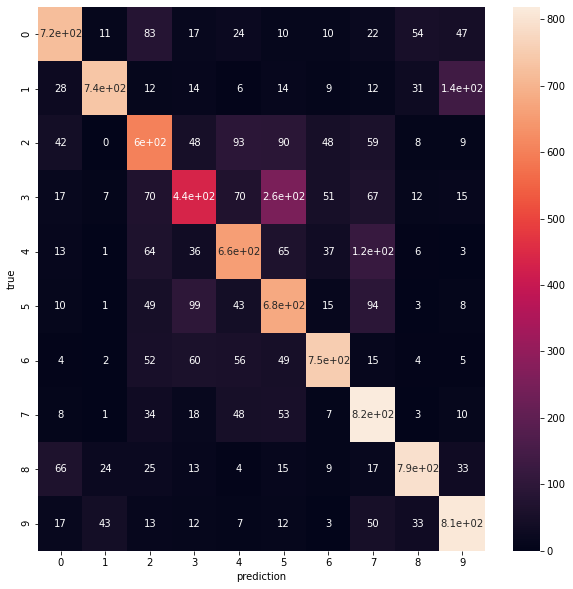

In [63]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm1 , annot=True)
plt.xlabel("prediction")
plt.ylabel("true")

In [64]:
y_test_predt_label[90:100]

[0, 4, 8, 6, 4, 6, 6, 0, 0, 3]

In [65]:
y_test[90:100] 

array([0, 3, 8, 6, 4, 6, 6, 0, 0, 7], dtype=uint8)

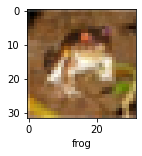

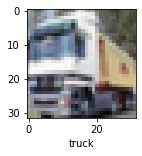

In [66]:
for i in range(2):
    plt.figure(figsize=(8,2))
    plt.imshow(x_train[i]) 
    plt.xlabel(classes[y_train[i]])
    plt.show()

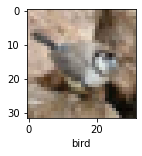

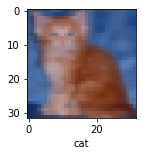

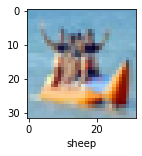

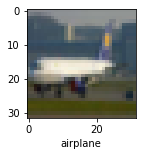

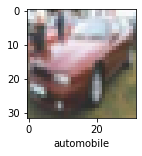

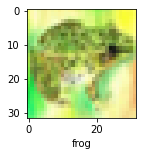

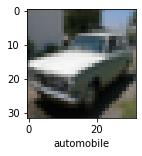

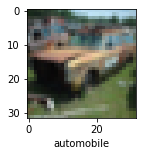

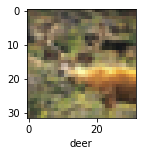

In [213]:
for i in range(90,99): 
    plt.figure(figsize=(8,2)) 
    plt.imshow(x_train[i]) 
    plt.xlabel(classes[y_train[i]]) 
    plt.show() 

In [244]:
print(" cnn model prediction: " , y_test_predt_label[0:10] ) 
print(" actual values       : "        , y_test[0:10]) 

 cnn model prediction:  [3, 8, 8, 0, 6, 6, 1, 6, 3, 1]
 actual values       :  [3 8 8 0 6 6 1 6 3 1]


In [245]:
for i in range(11):
    print("image recognised by cnn model:    ",classes[y_test_predt_label[i]])
    print("Real image is                :    "     , classes[y_test[i]]) 

image recognised by cnn model:     cat
Real image is                :     cat
image recognised by cnn model:     sheep
Real image is                :     sheep
image recognised by cnn model:     sheep
Real image is                :     sheep
image recognised by cnn model:     airplane
Real image is                :     airplane
image recognised by cnn model:     frog
Real image is                :     frog
image recognised by cnn model:     frog
Real image is                :     frog
image recognised by cnn model:     automobile
Real image is                :     automobile
image recognised by cnn model:     frog
Real image is                :     frog
image recognised by cnn model:     cat
Real image is                :     cat
image recognised by cnn model:     automobile
Real image is                :     automobile
image recognised by cnn model:     sheep
Real image is                :     airplane
